<a href="https://colab.research.google.com/github/Marchbreeze/Edu-Public-Data/blob/main/corr_middle_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 고등학교 5개년 데이터 통합
import pandas as pd

file_paths = [
    'paps_middleschool_2024.csv',
    'paps_middleschool_2023.csv',
    'paps_middleschool_2022.csv',
    'paps_middleschool_2021.csv',
    'paps_middleschool_2020.csv'
]

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df

<ipython-input-1-cdfe85bd4ba9>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file_path) for file_path in file_paths]


,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,1학년,...,6.9,87.0,43.1,87.0,43.1,14.0,6.9,0.0,0.0,202.0
1,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,2학년,...,10.3,84.0,45.7,68.0,37.0,12.0,6.5,1.0,0.5,184.0
2,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,3학년,...,7.6,84.0,49.1,59.0,34.5,13.0,7.6,2.0,1.2,171.0
3,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,1학년,...,4.7,47.0,44.3,40.0,37.7,13.0,12.3,1.0,0.9,106.0
4,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,2학년,...,0.0,24.0,24.2,61.0,61.6,13.0,13.1,1.0,1.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76939,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,1학년,...,13.4,82.0,55.0,40.0,26.8,4.0,2.7,3.0,2.0,149.0
76940,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,2학년,...,15.1,52.0,35.6,50.0,34.2,21.0,14.4,1.0,0.7,146.0
76941,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,2학년,...,13.6,54.0,61.4,20.0,22.7,2.0,2.3,0.0,0.0,88.0
76942,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,3학년,...,23.1,66.0,46.2,34.0,23.8,9.0,6.3,1.0,0.7,143.0


In [2]:
# column명 확인
df.columns

Index(['시도교육청', '교육지원청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '제외여부',
       '제외사유', '학년', '성별', '왕복오래달리기(회)', '오래달리기걷기(초)', '스텝검사(PEI)',
       '앉아윗몸앞으로굽히기(cm)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)', '윗몸말아올리기(회)', '악력(kg)',
       '50m달리기(초)', '제자리멀리뛰기(cm)', 'BMI(kg/㎡)', '체지방률(%fat)', '인원', '%',
       '인원.1', '%.1', '인원.2', '%.2', '인원.3', '%.3', '인원.4', '%.4', '검사인원수'],
      dtype='object')

In [3]:
import numpy as np

# 각 row에 대해 0인 데이터를 제외하고 백분위로 변환
def convert_to_percentiles(row):
    filtered_row = row[row > 0]
    percentiles = 100 * (filtered_row.rank(method='min') - 1) / (len(filtered_row) - 1)
    return percentiles.round(2)

# BMI 필터링 적용 (BMI는 백분위 변환에서 제외해야 하므로 원래 데이터프레임에서 필터링)
df_filtered = df[(df['BMI(kg/㎡)'] >= 15) & (df['BMI(kg/㎡)'] <= 35)]

# DataFrame에서 숫자형 데이터만 포함하는 열을 선택해 적용
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('학교급코드')

# 선택된 숫자형 열에 대해서만 apply 함수를 사용하여 각 행에 대해 백분위 변환 함수 적용
df_percent = df_filtered[numeric_columns].apply(convert_to_percentiles, axis=1)

# 백분위로 변환된 데이터를 원래 DataFrame에 병합
df_filtered[numeric_columns] = df_percent
df_filtered

<ipython-input-3-c25e75c3e4d3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_columns] = df_percent


,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,1학년,...,76.92,NaN,30.77,84.62,84.62,30.77,NaN,NaN,NaN,NaN
1,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,2학년,...,80.00,NaN,46.67,93.33,86.67,40.00,6.67,NaN,NaN,NaN
2,서울특별시교육청,서울특별시성북강북교육지원청,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,3학년,...,86.67,NaN,40.00,93.33,80.00,40.00,6.67,NaN,NaN,NaN
3,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,1학년,...,60.00,NaN,20.00,86.67,73.33,33.33,6.67,100.0,NaN,NaN
5,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,3학년,...,53.33,NaN,6.67,73.33,86.67,33.33,20.00,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76939,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,1학년,...,66.67,94.44,44.44,88.89,72.22,16.67,11.11,NaN,NaN,77.78
76940,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,2학년,...,93.33,NaN,46.67,86.67,80.00,40.00,6.67,NaN,NaN,NaN
76941,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,2학년,...,66.67,NaN,20.00,80.00,40.00,0.00,NaN,100.0,NaN,NaN
76942,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,3,공립,N,NaN,3학년,...,80.00,93.33,60.00,86.67,66.67,26.67,6.67,NaN,NaN,NaN


In [9]:
# 0이 아닌 백분위 값에 대해서 평균 행 추가
columns_of_interest = ['왕복오래달리기(회)', '종합유연성(점)', '(무릎대고)팔굽혀펴기(회)',
                       '윗몸말아올리기(회)', '50m달리기(초)', '제자리멀리뛰기(cm)']

df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)
df_result = df_filtered[['평균', 'BMI(kg/㎡)']]
df_result = df_result[(df_result['평균'] < 90) & (df_result['평균'] > 25) & (df_result['BMI(kg/㎡)'] < 100) & (df_result['BMI(kg/㎡)'] > 15)]
df_result

<ipython-input-9-754a67a2bc8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['평균'] = df_filtered[columns_of_interest].apply(lambda row: row[row > 0].mean(), axis=1)


,평균,BMI(kg/㎡)
0,57.690000,53.85
1,51.110000,60.00
2,44.443333,66.67
3,53.330000,53.33
5,53.330000,53.33
...,...,...
76938,46.666667,60.00
76939,44.445000,55.56
76940,51.110000,73.33
76941,51.665000,60.00


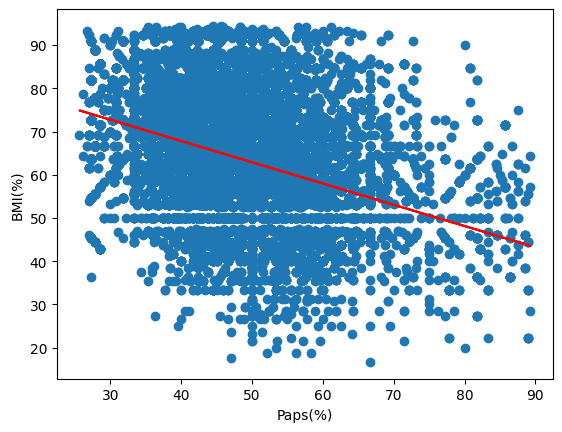

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

# 데이터 준비
x = df_result['평균']
y = df_result['BMI(kg/㎡)']

# DataFrame으로 결합하여 결측치 제거
df = pd.DataFrame({'x': x, 'y': y})
df.dropna(inplace=True)

# 결측치 제거 후 x, y 다시 할당
x = df['x']
y = df['y']

# scipy를 사용한 선형 회귀
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# 선형 회귀 직선 플로팅
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, 'r', label='fitted line')

# 라벨 추가
plt.xlabel('Paps(%)')
plt.ylabel('BMI(%)')

# 그래프 표시
plt.show()

In [11]:
# 상관관계 표시
correlation = df_result.corr(method = 'spearman')
correlation

,평균,BMI(kg/㎡)
평균,1.000000,-0.423546
BMI(kg/㎡),-0.423546,1.000000
